In [1]:
%matplotlib notebook

In [2]:
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#load files
ride_data = "C:/Users/ellis/Downloads/ride_data.csv"
city_data = "C:/Users/ellis/Downloads/city_data.csv"

In [5]:
ride_df = pd.read_csv(ride_data)
ride_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 4 columns):
city       2375 non-null object
date       2375 non-null object
fare       2375 non-null float64
ride_id    2375 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 74.3+ KB


In [6]:
city_df = pd.read_csv(city_data)
city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 3 columns):
city            120 non-null object
driver_count    120 non-null int64
type            120 non-null object
dtypes: int64(1), object(2)
memory usage: 2.9+ KB


In [15]:
#merge dataFrames
merged_df = pd.merge(ride_df, city_df, on="city",how="left")
merged_df.head()
# merged_df["type"].value_counts()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


<IPython.core.display.Javascript object>


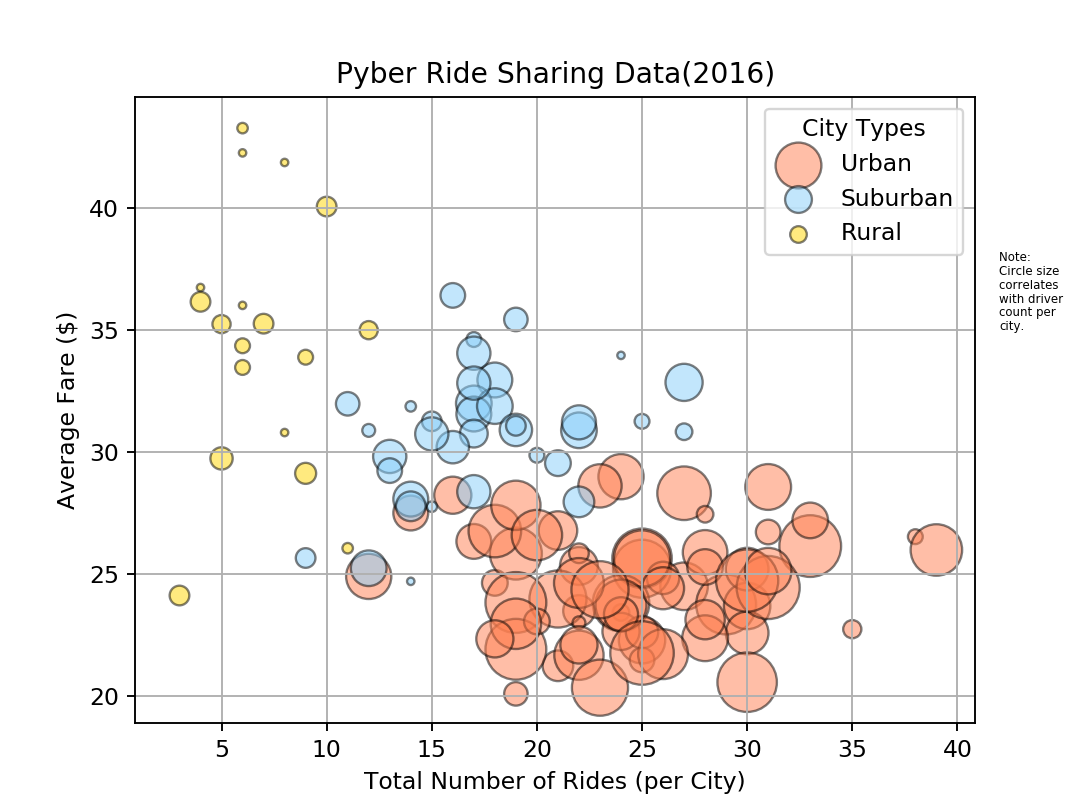

In [39]:
#Scatter plot

#group by to get numbers for x/y axis
urban_type = merged_df[merged_df["type"] == "Urban"].groupby([merged_df["city"]])
suburban_type = merged_df[merged_df["type"] == "Suburban"].groupby([merged_df["city"]])
rural_type = merged_df[merged_df["type"] == "Rural"].groupby([merged_df["city"]])

#x-axis values
urbanTotalRide = urban_type["ride_id"].count()
suburbanTotalRide = suburban_type["ride_id"].count()
ruralTotalRide = rural_type["ride_id"].count()

#y-axis values
urbanAvgFare = urban_type["fare"].mean()
suburbanAvgFare = suburban_type["fare"].mean()
ruralAvgFare = rural_type["fare"].mean()

#bubbles (s-values in scatterplot)
urbanDriverCount = urban_type["driver_count"].mean()
suburbanDriverCount = suburban_type["driver_count"].mean()
ruralDriverCount = rural_type["driver_count"].mean()

#plotting(x-axis,y-xais,label,marker,facecolor,edgecolor,s=,alpha)

plt.scatter(urbanTotalRide,urbanAvgFare,label="Urban",marker="o",facecolor="coral",edgecolor="black",s=urbanDriverCount*10,alpha=.5)
plt.scatter(suburbanTotalRide,suburbanAvgFare,label="Suburban",marker="o",facecolor="lightskyblue",edgecolor="black",s=suburbanDriverCount*10,alpha=.5)
plt.scatter(ruralTotalRide,ruralAvgFare,label="Rural",marker="o",facecolor="gold",edgecolor="black",s=ruralDriverCount*10,alpha=.5)
plt.grid(True)

#titles&legend
plt.title("Pyber Ride Sharing Data(2016)")
plt.xlabel("Total Number of Rides (per City)")
plt.ylabel("Average Fare ($)")
legend = plt.legend(title= "City Types", loc="best")

# Incorporate a text label regarding circle size
plt.text(42,35,"Note: \nCircle size \ncorrelates \nwith driver \ncount per \ncity.", fontsize = 5)

# Save Figure
# plt.savefig("C:/Users/ellis/Downloads/PyberRideSharing.png", bbox_inches="tight")

# Show plot
plt.show()

<IPython.core.display.Javascript object>


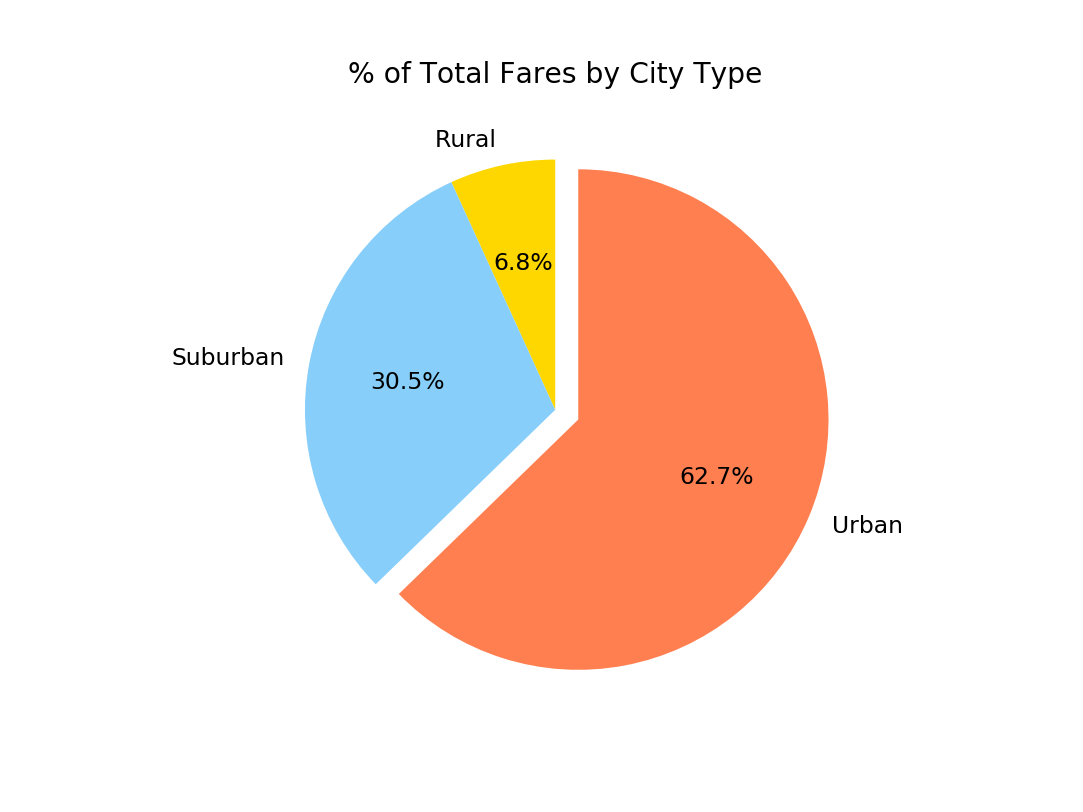

In [40]:
#Pie Chart(Total Fares)

#percentages
type_groupby = merged_df.groupby("type")
fare = type_groupby["fare"].sum()

#plotting

labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "lightskyblue", "coral"]
plt.pie(fare, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", startangle=90)

#title
plt.title("% of Total Fares by City Type")

# Save Figure
# plt.savefig("C:/Users/ellis/Downloads/TotalFaresbyCityType.png")

# Show Figure
plt.show()

<IPython.core.display.Javascript object>


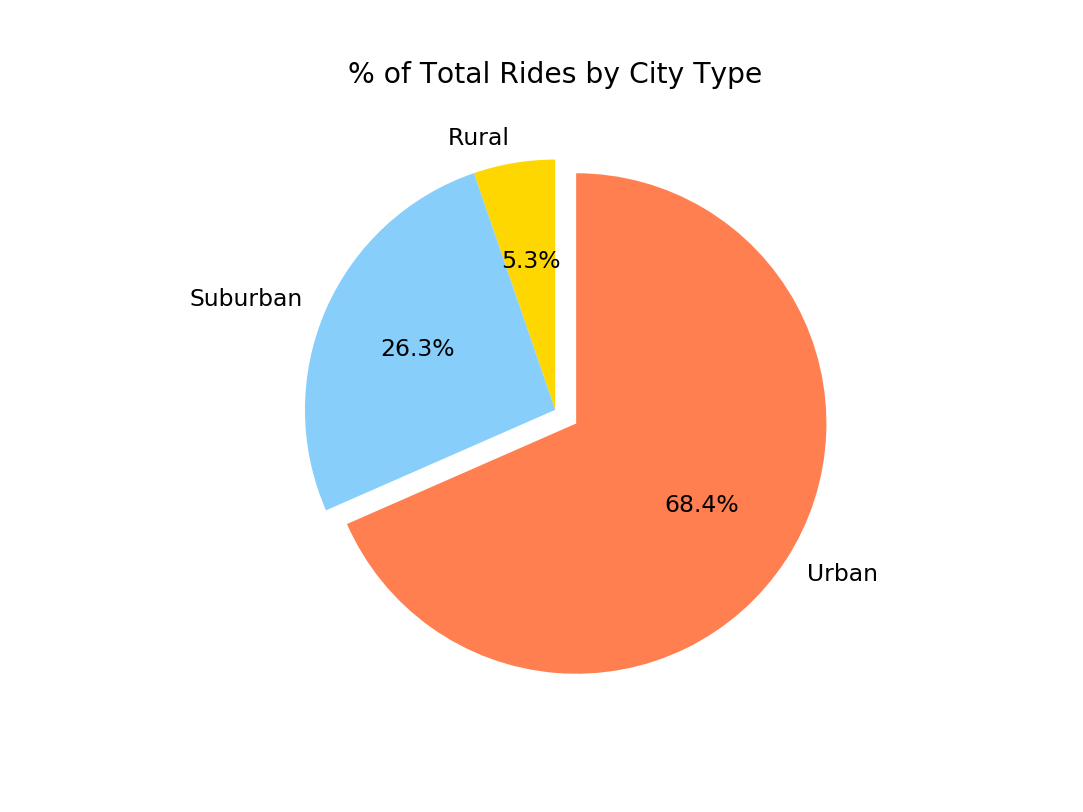

In [41]:
#Pie Chart(Total Rides)

#percentages
rides = type_groupby["ride_id"].count()

#plotting

labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "lightskyblue", "coral"]
plt.pie(rides, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", startangle=90)

#title
plt.title("% of Total Rides by City Type")

# Save Figure
# plt.savefig("C:/Users/ellis/Downloads/TotalRidesbyCityType.png")

# Show Figure
plt.show()

<IPython.core.display.Javascript object>


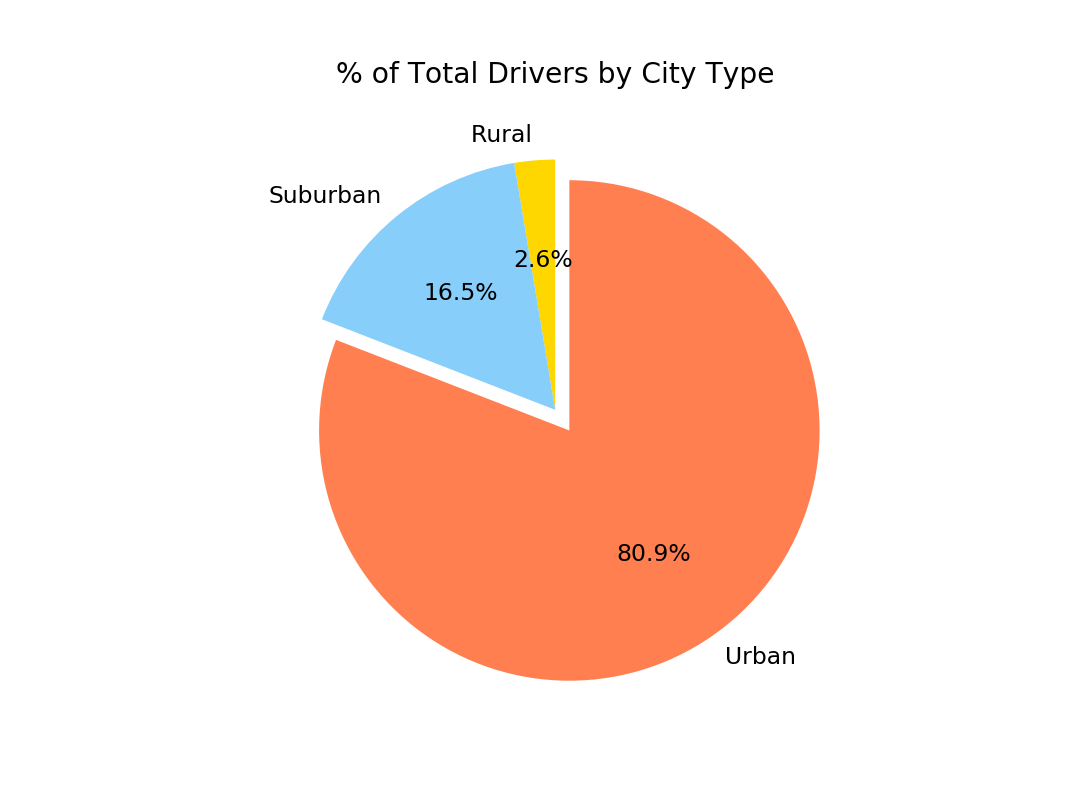

In [42]:
#Pie Chart(Total Drivers)

#percentages
driverType = city_df.groupby(['type'])
driverTotal = driverType['driver_count'].sum()

#plotting

labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "lightskyblue", "coral"]
plt.pie(driverTotal, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", startangle=90)

#title
plt.title("% of Total Drivers by City Type")

# Save Figure
# plt.savefig("C:/Users/ellis/Downloads/TotalDriversbyCityType.png")

# Show Figure
plt.show()